# Objects and references

Learning objectives:
- objects vs references (heap vs stack)
- primitive data types (int, float, str, bool) are objects in Python
- tuple data structure (immutable version of lists)
- creating custom types (syntax, purpose):
    - namedtuple (immutable)
    - recordclass (mutable)
- new mental model for state (v2)
    - incorporates objects and references
- == vs is:
    - == compares objects
    - is compares references

In [ ]:
# This cell just makes juypter notebook use the full width of the screen and changes 
# some of the text to red.  You can ignore this cell
from IPython.core.display import HTML
HTML('<style>em { color: red; }</style> <style>.container {width:100% !important; }</style>')

In [ ]:
# import statements
from collections import namedtuple
from recordclass import recordclass

### Review 1: What is the type of: {}
1. set
2. dict

In [ ]:
type({})

### Review 2: If S is a string and L is a list, which line definitely fails?
1. S[-1] = "."
2. L[len(S)] = S

In [ ]:
S = "abcde"
S[-1] = "."

In [ ]:
# Scenario 1: length of S is less than length of L
# This would work.
S = "abcde"
print(len(S))
L = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
L[len(S)] = S
L

In [ ]:
#Scenario 2: length of S is greater than length of L
# This wouldn't work!
S = "abcdefghijklmnopqrstuvwxyz"
print(len(S))
L = [1, 2, 3, 4, 5]
L[len(S)] = S

### Review 3: Which type is immutable?
1. str
2. list
3. dict

In [ ]:
# list and dict are mutable
# str is immutable

## Objects vs references

Observations:
- objects have a "life of their own" beyond variables or even function frames
- here there are dict and list objects (others are possible)
- references show up two places: as variables and values in data structures
- all primitive values (int, str, float, bool) are objects too in Python

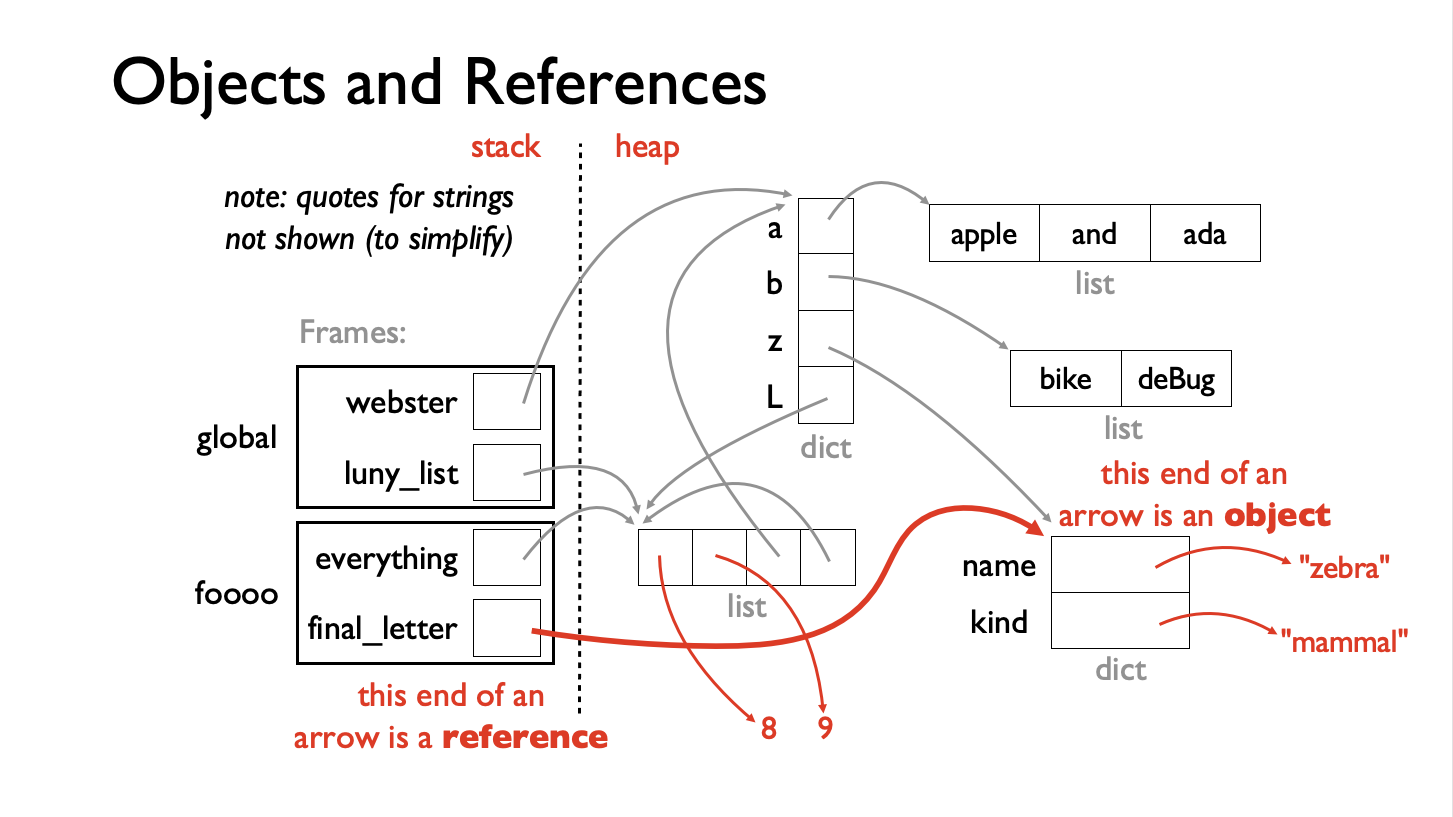

Questions
- why do we need this more complicated model?
- how can we create new types of objects?
- how can we compare objects and references?
- how can we copy objects to create new objects?

## Tuple data structure
- immutable version of lists
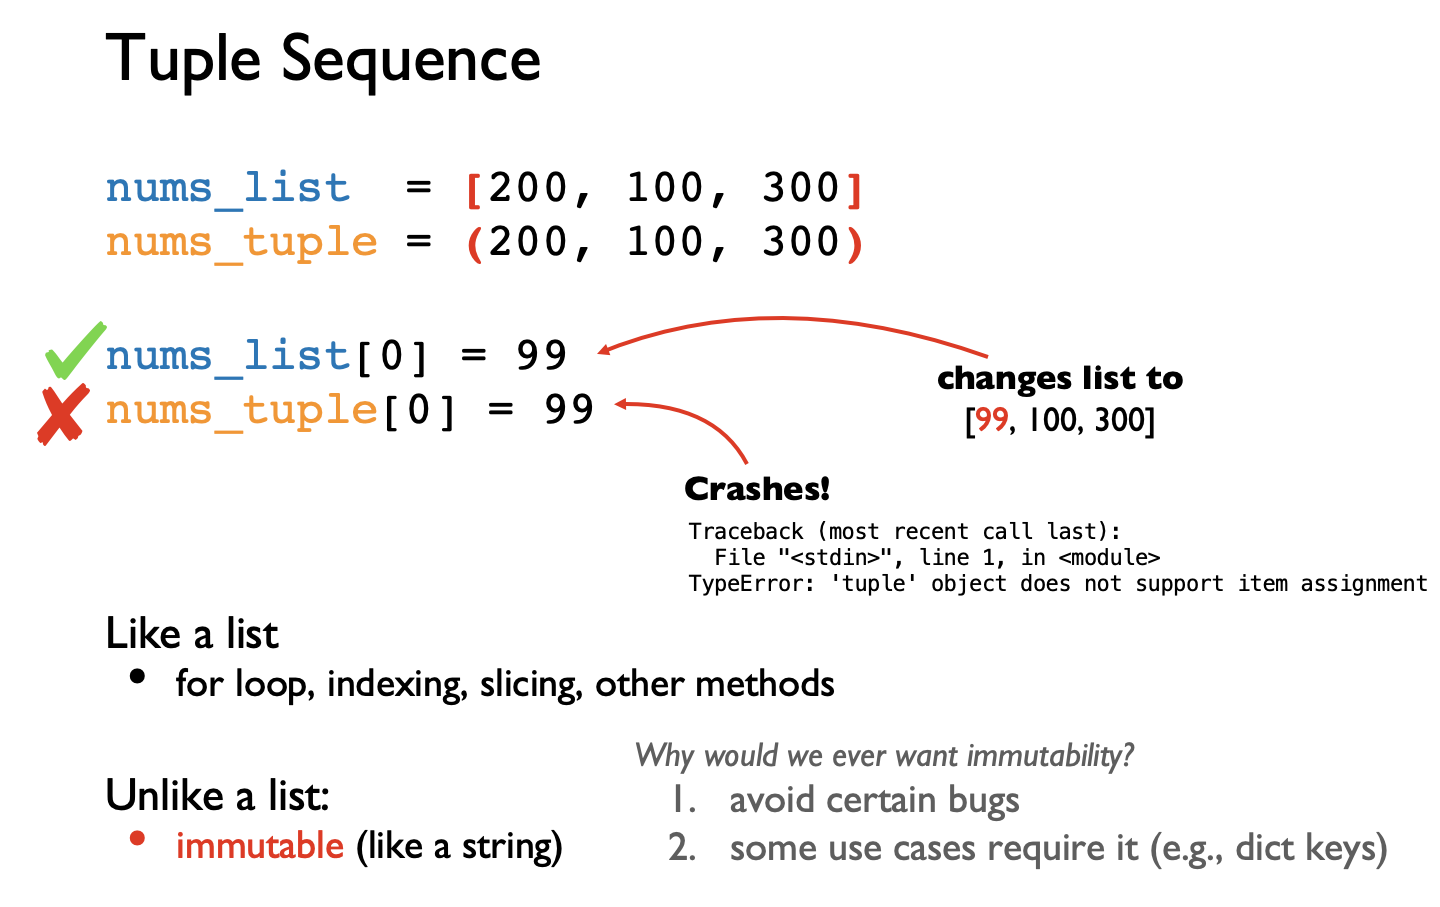

In [ ]:
t = (1, 2, 3)

# Indexing
print("First val is:", t[0])

# Slicing
print("Subset tuple is:", t[1:3])

# For loop
for val in t:
    print(t)
    
# Cannot mutate
# t[2] = 4 # uncomment to see TypeError

### What are the key features of tuples?

In [ ]:
# 1. immutable
# 2. indexing
# 3. slicing
# 4. for loops

#### (1 + 2) ---> is this a tuple or specifying operator precedence?

In [ ]:
type((1 + 2))

#### So how do we create a tuple of size 1?

In [ ]:
t = (1 + 2,)
print(type(t))
t

### Usecase for tuples:
1. storing immutable data, for example: student netid or campus ID
2. can be used as dictionary keys (recall that we cannot use lists as dictionary keys)

In [ ]:
# Fails with TypeError
buildings = {
    [0,0]: "Comp Sci",
    [0,2]: "Psychology",
    [4,0]: "Noland",
    [1,8]: "Van Vleck" }

In [ ]:
# Works with tuple as keys
buildings = {
    (0,0): "Comp Sci",
    (0,2): "Psychology",
    (4,0): "Noland",
    (1,8): "Van Vleck" }

## Custom types

### Can you spot the bug - v1?

In [ ]:
people = [
  {"Fname": "Alice", "lname": "Anderson", "age": 30},
  {"fname": "Bob", "lname": "Baker", "age": 31},
]
p = people[0]
print("Hello " + p["fname"] + " " + p["lname"])

### What is the fix - v1?

In [ ]:
people = [
  {"fname": "Alice", "lname": "Anderson", "age": 30},
  {"fname": "Bob", "lname": "Baker", "age": 31},
]
p = people[0]
print("Hello " + p["fname"] + " " + p["lname"])


### Can you spot the bug - v2?

In [ ]:
people = [
  ("Alice", "Anderson", 30),
  ("Bob", "Baker", 31),
]
p = people[1]
print("Hello " + p[1] + " " + p[2])

### What is the fix - v2?

In [ ]:
people = [
  ("Alice", "Anderson", 30),
  ("Bob", "Baker", 31),
]
p = people[1]
print("Hello " + p[0] + " " + p[1])

## namedtuple

- need to import using: from collections import	 namedtuple

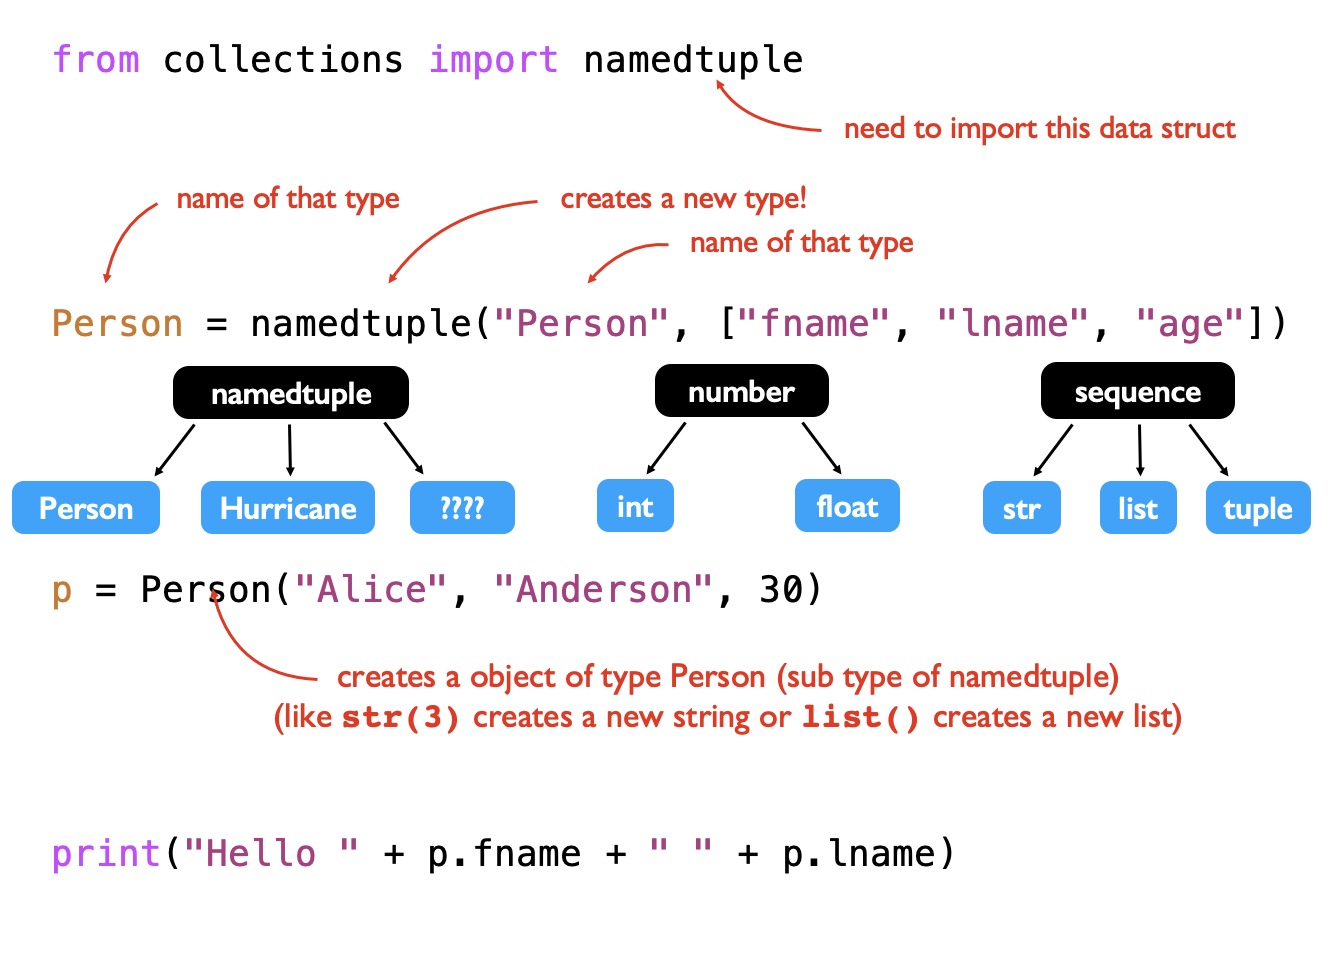

In [ ]:
# Create custom type
Person = namedtuple("Person", ["fname", "lname", "age"])

# Create object instance of custom type
p1 = Person("Alice", "Anderson", 30)
p2 = Person(age = 30, fname = "Alice", lname = "Anderson")

# Access attributes of custom type
print("Hello " + p1.fname + " " + p1.lname)

### What are the key features of namedtuples?

In [ ]:
# 1. immutable
# 2. creates custom types

#### Self-check: create Hurricane custom type with attributes name, speed, and year

#### If you were successful then the cell below should run without errors

In [ ]:
H = Hurricane(name = "Hugo", speed = 160, year = 1989)
print("In "+str(H.year)+" hurricane "+ H.name +" experienced a top speed of "+str(H.speed)+" mph.")

## recordclass

- requires installation using pip install recordclass
- requires import: from recordclass import recordclass

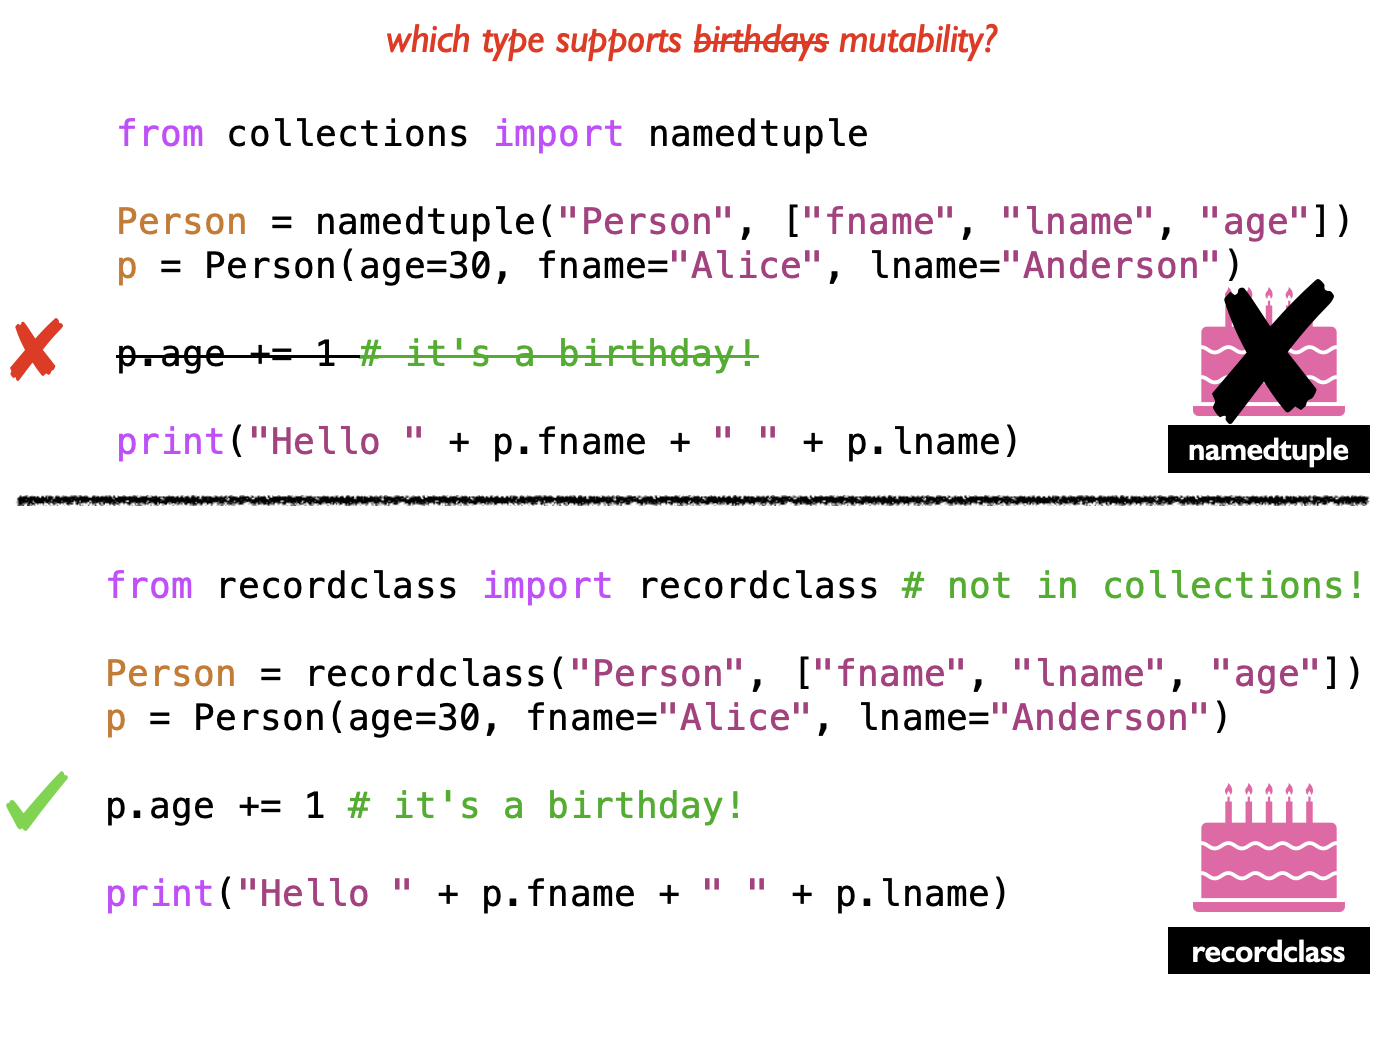

In [ ]:
from recordclass import	 recordclass # not in collections!

Person = recordclass("Person", ["fname", "lname", "age"])
p = Person(age = 30, fname = "Alice", lname = "Anderson")

p.age += 1 # it's a birthday!

print("Hello " + p.fname + " " + p.lname)

### What are the key features of recordclass?

In [ ]:
# 1. mutable
# 2. creates custom types

### Copy the examples below into Python Tutor and trace the code

In [ ]:
# Example 1: Reassigning parameters
def f(x):
    x *= 3
    print("f:", x)

num = 10
f(num)
print("after:", num)

In [ ]:
# Example 2: Modifying a list
def f(items):
    items.append("!!!")
    print("f:", items)

words = ['hello', 'world']
f(words)
print("after:", words)

In [ ]:
# Example 3: Reassign new list
def f(items):
    items = items + ["!!!"]
    print("f:", items)

words = ['hello', 'world']
f(words)
print("after:", words)


In [ ]:
# Example 4: in-place sort
def first(items):
    return items[0]

def smallest(items):
    items.sort()
    return items[0]

numbers	= [4,5,3,2,1]
print("first:", first(numbers))
print("smallest:", smallest(numbers))
print("first:", first(numbers))


In [ ]:
# Example 5: sorted sort
def first(items):
    return items[0]

def smallest(items):
    items = sorted(items)
    return items[0]

numbers	= [4,5,3,2,1]
print("first:", first(numbers))
print("smallest:", smallest(numbers))
print("first:", first(numbers))


### Experiment with == and is.  Try the "ha" * 10 vs "ha" * 1000 vs "ha" * 1 examples.

In [ ]:
multiplier = 10

a = "ha" * multiplier
b = "ha" * multiplier
print(a == b)
print(a is b)

In [ ]:
multiplier = 1000

a = "ha" * multiplier
b = "ha" * multiplier
print(a == b)
print(a is b)

In [ ]:
multiplier = 1

a = "ha" * multiplier
b = "ha" * multiplier
print(a == b)
print(a is b)